In [10]:
# Phase 1: Install and import all necessary libraries
!pip install --quiet yfinance pandas requests beautifulSoup4 plotly
# Import librabries for use in this notebook
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
print ("All necessary libraries installed and imported successfully.")

All necessary libraries installed and imported successfully.


In [18]:
# Phase 2: Data extraction for all stocks
# Objective: Extract historical share price and quarterly revenue for TSLA,AMZN,AMD,GME
# Approach: We will define a list of tickers and loop through them using yfinance.ticker to fetch the required data

# Define the list of stock ticker symbols
stocks = ["TSLA", "AMZN", "AMD", "GME"]

# Initialize dictionaries to store extracted data
# These dictionaries will hold Pandas DataFrames/Series for each stock
all_stock_historical_data = {}
all_stock_quarterly_revenue = {}

print("Step 2: Starting data extraction for all stocks...")

# Loop through each ticker symbol to fetch data
for ticker_symbol in stocks:
    print(f"\n--- Processing data for {ticker_symbol} ---")
    ticker = yf.Ticker(ticker_symbol)

    # 2.1: Extract Historical Share Price
    try:
        # Fetch max available historical data for comprehensive analysis
        hist_price = ticker.history(period="max")
        if not hist_price.empty:
            all_stock_historical_data[ticker_symbol] = hist_price
            print(f"   Successfully downloaded {len(hist_price)} historical price rows for {ticker_symbol}.")
            # Optional: Display first few rows to quickly check data format
            # print(hist_price.head())
        else:
            print(f"   No historical price data found for {ticker_symbol}.")
    except Exception as e:
        print(f"   Error downloading historical price for {ticker_symbol}: {e}")

    # 2.2: Extract Quarterly Revenue Reportings
    try:
        q_financials = ticker.quarterly_income_stmt
        if not q_financials.empty and 'Total Revenue' in q_financials.index:
            # Extract 'Total Revenue' row and sort by date (oldest first)
            revenue_data = q_financials.loc['Total Revenue'].sort_index()
            all_stock_quarterly_revenue[ticker_symbol] = revenue_data
            print(f"   Successfully downloaded quarterly 'Total Revenue' for {ticker_symbol}.")
            # print(revenue_data.tail()) # Display last few quarters
        elif not q_financials.empty and 'Sales Revenue' in q_financials.index:
            # Fallback for companies that use 'Sales Revenue' instead of 'Total Revenue'
            revenue_data = q_financials.loc['Sales Revenue'].sort_index()
            all_stock_quarterly_revenue[ticker_symbol] = revenue_data
            print(f"   Successfully downloaded quarterly 'Sales Revenue' for {ticker_symbol}.")
            # print(revenue_data.tail())
        else:
            print(f"   Could not find 'Total Revenue' or 'Sales Revenue' in quarterly income statement for {ticker_symbol}. Quarterly data might be empty.")
            all_stock_quarterly_revenue[ticker_symbol] = pd.Series(dtype='float64') # Store an empty Series for consistency
    except Exception as e:
        print(f"   Error downloading quarterly financials for {ticker_symbol}: {e}")

print("\nStep 2: Data extraction complete for all stocks.")

# --- Quick Verification ---
print("\n--- Data Collection Summary ---")
for ticker_symbol in stocks:
    price_status = "Available" if ticker_symbol in all_stock_historical_data and not all_stock_historical_data[ticker_symbol].empty else "NOT found"
    revenue_status = "Available" if ticker_symbol in all_stock_quarterly_revenue and not all_stock_quarterly_revenue[ticker_symbol].empty else "NOT found"
    print(f"{ticker_symbol}: Historical Price - {price_status}, Quarterly Revenue - {revenue_status}")

# I can inspect specific DataFrames/Series in new cells, e.g.:
# print("\nExample: Amazon Historical Data Head:")
# print(all_stock_historical_data['AMZN'].head())
#
# print("\nExample: GameStop Quarterly Revenue:")
# print(all_stock_quarterly_revenue['GME'])

Step 2: Starting data extraction for all stocks...

--- Processing data for TSLA ---
   Successfully downloaded 3773 historical price rows for TSLA.
   Successfully downloaded quarterly 'Total Revenue' for TSLA.

--- Processing data for AMZN ---
   Successfully downloaded 7074 historical price rows for AMZN.
   Successfully downloaded quarterly 'Total Revenue' for AMZN.

--- Processing data for AMD ---
   Successfully downloaded 11414 historical price rows for AMD.
   Successfully downloaded quarterly 'Total Revenue' for AMD.

--- Processing data for GME ---
   Successfully downloaded 5881 historical price rows for GME.
   Successfully downloaded quarterly 'Total Revenue' for GME.

Step 2: Data extraction complete for all stocks.

--- Data Collection Summary ---
TSLA: Historical Price - Available, Quarterly Revenue - Available
AMZN: Historical Price - Available, Quarterly Revenue - Available
AMD: Historical Price - Available, Quarterly Revenue - Available
GME: Historical Price - Availa

Step 3.1: Generating visualizations for Tesla (TSLA)...


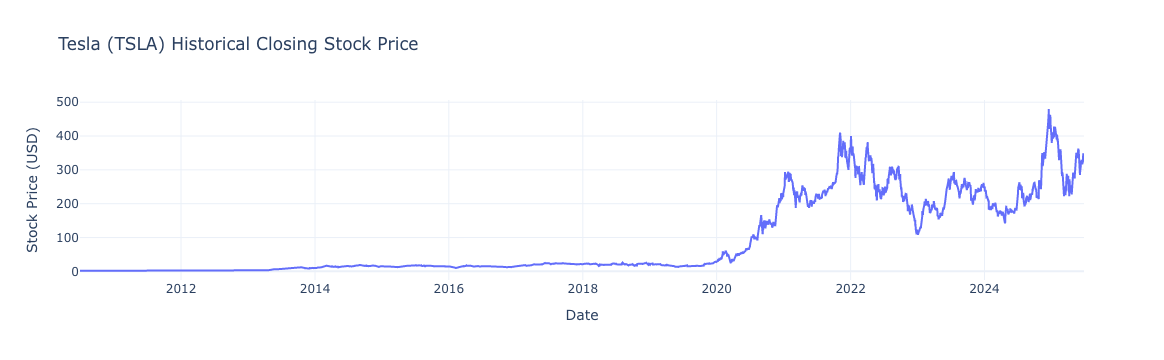

   TSLA Historical Price Chart generated.


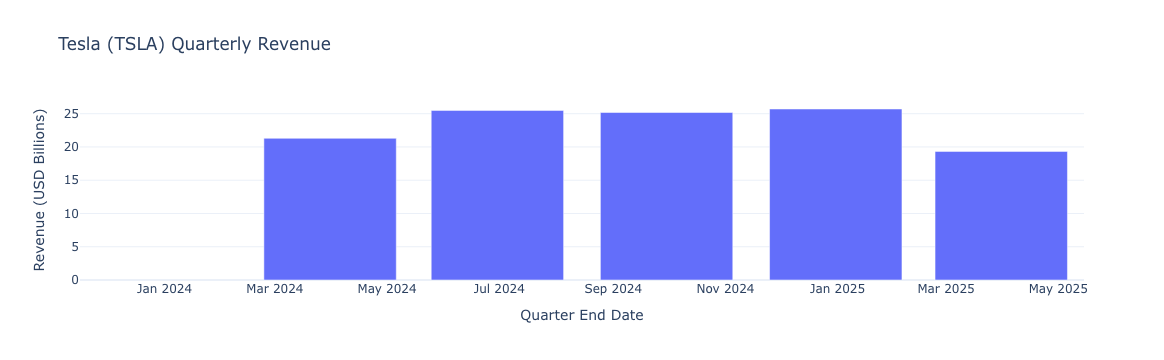

   TSLA Quarterly Revenue Chart generated.
Step 3.1: Visualizations for Tesla (TSLA) complete.


In [20]:
# --- Phase 3: Data Visualization for Tesla (TSLA) ---

print("Step 3.1: Generating visualizations for Tesla (TSLA)...")

# --- Get TSLA Data ---
tsla_hist_price = all_stock_historical_data['TSLA']
tsla_revenue_data = all_stock_quarterly_revenue['TSLA']

# --- 3.1.1: Historical Closing Price Chart for TSLA ---
fig_tsla_price = go.Figure()

fig_tsla_price.add_trace(go.Scatter(
    x=tsla_hist_price.index, # Dates are in the index
    y=tsla_hist_price['Close'], # We want the 'Close' price
    mode='lines',
    name='TSLA Closing Price'
))

fig_tsla_price.update_layout(
    title='Tesla (TSLA) Historical Closing Stock Price',
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    hovermode="x unified", # Enhances interactivity on hover
    template="plotly_white" # Optional: Sets a clean white background
)

fig_tsla_price.show()
print("   TSLA Historical Price Chart generated.")

# --- 3.1.2: Quarterly Revenue Bar Chart for TSLA ---
# Ensure revenue data is not empty before plotting
if not tsla_revenue_data.empty:
    fig_tsla_revenue = go.Figure()

    fig_tsla_revenue.add_trace(go.Bar(
        x=tsla_revenue_data.index, # Dates are in the index
        y=tsla_revenue_data.values / 1e9, # Divide by 1 Billion for better scale (e.g., $20,000,000,000 becomes $20)
        name='Quarterly Revenue'
    ))

    fig_tsla_revenue.update_layout(
        title='Tesla (TSLA) Quarterly Revenue',
        xaxis_title='Quarter End Date',
        yaxis_title='Revenue (USD Billions)',
        hovermode="x unified",
        template="plotly_white"
    )

    fig_tsla_revenue.show()
    print("   TSLA Quarterly Revenue Chart generated.")
else:
    print("   TSLA Quarterly Revenue data is empty, skipping revenue chart.")

print("Step 3.1: Visualizations for Tesla (TSLA) complete.")

1. Analysis: Tesla (TSLA) Historical Closing Stock Price

The historical closing price of Tesla (TSLA) stock, when observed from 2012 to 2019, exhibited a period of relatively low valuation and stable growth. During these years, the stock price generally remained within a modest range, reflecting the company's nascent stage as an automotive manufacturer.

A dramatic shift occurred in 2020, marking the beginning of a significant upward trend. This period saw the stock price surge, indicating heightened investor confidence and rapid market adoption of electric vehicles. This momentum carried into early 2021, with the price peaking around $283 in February 2021.

Following this peak, the stock experienced a sharp correction, declining to approximately $215 by July of the same year, which represented its lowest point for 2021. However, this downturn was temporary. The price quickly rebounded, ascending to a new high of approximately $387.5. This was followed by another notable correction in January 2023, bringing the price down to around $218.

Despite these periods of volatility, TSLA resumed its upward trajectory, reaching an all-time high of approximately $421 in December 2024. Subsequently, the stock entered a downtrend through early 2025, bottoming out around $239 in April 2025. The price has since demonstrated a recovery, reaching approximately $366 in May 2025, and is currently trading around $316 as of June 2025.

In summary, TSLA's historical price performance is characterized by an initial phase of stability followed by periods of explosive growth punctuated by significant, albeit temporary, corrections and high volatility. This pattern reflects the dynamic nature of the EV market and the speculative aspects often associated with high-growth technology stocks."

Key Changes and Why:

. "low and stable" -> "relatively low valuation and stable growth" (more formal)

. "price shoot up dramatically and went uptrend" -> "dramatic shift occurred in 2020, marking the beginning of a significant upward trend" (more professional, structured)

. "shoot up to high level price $283" -> "peaking around $283"

. "drop in July same year to 215 all time low for the year" -> "sharp correction, declining to approximately $215 by July of the same year, which represented its lowest point for 2021" (uses financial terms like "correction")

. "After the low price went up as high as $387.5 and dropped down to new low of $218" -> "quickly rebounded, ascending to a new high of approximately $387.5. This was followed by another notable correction in January 2023, bringing the price down to around $218." (better flow, uses "ascended")

. "all time high $421" -> "all-time high of approximately $421" (adds "approximately" for precision)

. "started dropping till it got $239" -> "entered a downtrend through early 2025, bottoming out around $239"

. "picked up again and got to $366" -> "demonstrated a recovery, reaching approximately $366"

Summary: Added a concluding paragraph to encapsulate the overall character of the stock's movement.



2. Quarterly Revenue Analysis

 Examining Tesla's quarterly revenue data from March 2024 to May/June 2025 reveals a period of dynamic performance with notable shifts.

The fiscal year 2024 began with a revenue of $21.3 billion for the quarter ending March 31st. This was followed by a healthy rise to $25.5 billion by June 30th, 2024, indicating strong sequential growth. A slight modest decline was observed in the quarter ending September 30th, 2024, to $25.1 billion, suggesting a minor pause in growth, potentially due to seasonal factors or temporary market adjustments.

However, the revenue rebounded robustly in the quarter ending December 31st, 2024, reaching $25.7 billion. This marked the highest quarterly revenue within this specific period, often influenced by year-end delivery pushes and strong consumer demand during the holiday season.

A significant shift occurred in the subsequent quarter: revenue experienced a dramatic drop to $19.3 billion by March 31st, 2025. This substantial sequential decline suggests notable headwinds during Q1 2025.

Potential factors contributing to these revenue variations, particularly the Q1 2025 decline, often include:

Production Ramp-ups/Shutdowns: Tesla frequently undertakes factory upgrades or retooling (e.g., for refreshed Model Y production lines), which can temporarily reduce output and deliveries.

Slower Cybertruck Production Ramp: The initial rollout of new vehicles like the Cybertruck can be slower than anticipated, not immediately contributing substantial revenue.

Increased Competition & Pricing Pressure: The global EV market is becoming increasingly competitive, especially from Chinese manufacturers. This often leads to price adjustments (like Tesla's price cuts) which can impact overall revenue per vehicle.

Softening Global EV Demand: Some markets experienced a slowdown in EV adoption rates, impacting overall sales volume.

Geopolitical and Economic Factors: Broader economic uncertainties, inflation, interest rates, and evolving trade policies can influence consumer spending on big-ticket items like EVs.

Regulatory Credits: Variations in the sale of regulatory credits to other automakers can also impact total revenue, although this is usually a smaller component.

The overall trend in this period, despite growth in mid-2024, highlights the challenges of maintaining consistent hyper-growth amidst evolving market dynamics and operational adjustments.

3. Interplay Between Stock Price and Revenue
   
   Analyzing the interplay between Tesla's historical stock price and its quarterly revenue reveals a complex but generally correlated relationship, frequently influenced by market sentiment and future growth expectations.

Initially, during the period of relatively stable stock prices from 2012 to 2019, revenue was also on a steady, albeit lower, growth trajectory. This suggests that the market was gradually pricing in Tesla's incremental progress as it scaled production and expanded its market presence.

The dramatic surge in TSLA's stock price starting in 2020 coincides with a period of accelerated and robust growth in quarterly revenue. This strong correlation indicates that investors were heavily rewarding Tesla's increasing sales volume, successful factory ramp-ups (like Gigafactories in Shanghai, Berlin, and Austin), and its expanding market share in the rapidly growing EV sector. The market's enthusiasm for the company's execution of its growth strategy was clearly reflected in its valuation.

However, it's crucial to note instances where the stock price exhibited higher volatility or sharp corrections** (e.g., the drops in July 2021 and January 2023, and the downtrend in early 2025), even as **revenue growth remained positive, or the declines were less severe proportionally. This suggests that while fundamental financial performance (revenue) is a key driver, the stock price is also significantly influenced by:

. Market Sentiment and Expectations: Tesla's valuation often incorporates a significant premium based on its future growth potential in EVs, AI, and autonomous driving. Any perceived slowdown in this potential, even if current revenue is strong, can trigger price corrections.
. CEO Elon Musk's Public Statements and Activities: News related to major announcements, production targets, or even controversies can create immediate and sometimes disproportionate impacts on the stock price, regardless of the underlying quarterly revenue. 
. Competitive Landscape: Increased competition in the EV space from both legacy automakers and new entrants (e.g., Chinese EV makers) can introduce concerns about market share and future profitability, affecting investor confidence.
. Macroeconomic Factors: Broader economic conditions, interest rate changes (which impact financing for car purchases and valuation models), and supply chain challenges can also influence both production capacity and consumer demand, indirectly affecting stock price independent of specific quarter's revenue.
. Production and Delivery Targets: Investor focus often shifts to vehicle delivery numbers and production capabilities, which serve as leading indicators for future revenue. Missed targets, even if revenue is within a reasonable range, can negatively impact the stock.
